In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
76,19-05-2020,6204,106530
77,20-05-2020,5941,112471
78,21-05-2020,5982,118453
79,22-05-2020,6342,124795


In [5]:
dt['days']=np.arange(0, len(dt), 1)
data=dt[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
76,76,106530
77,77,112471
78,78,118453
79,79,124795


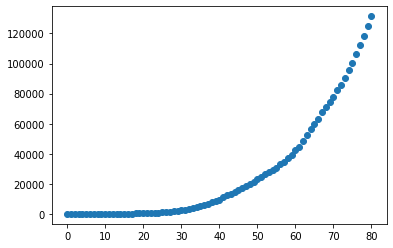

In [6]:
plt.scatter(data['days'], data['confirmed'])

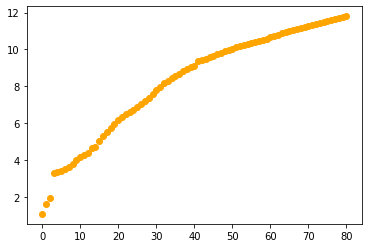

In [7]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [8]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

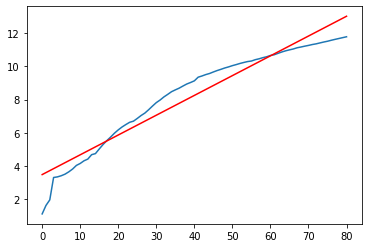

In [9]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

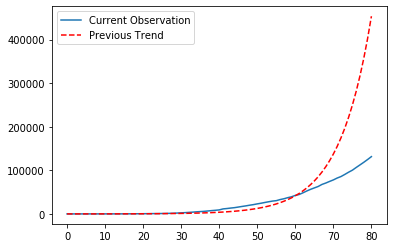

In [10]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [11]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9334411462752615

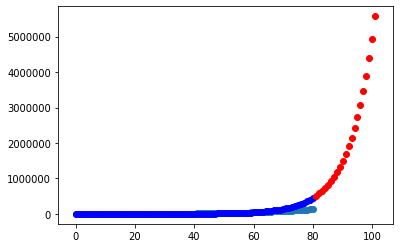

In [12]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [13]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101]),
 array([[ 510987.91165632],
        [ 575801.37960416],
        [ 648835.75754146],
        [ 731133.78184993],
        [ 823870.44910671],
        [ 928369.79190578],
        [1046123.78251661],
        [1178813.63427423],
        [1328333.80482749],
        [1496819.04394822],
        [1686674.87207181],
        [1900611.92472166],
        [2141684.65316436],
        [2413334.93383795],
        [2719441.20917957],
        [3064373.86145283],
        [3453057.61016557],
        [3891041.82394681],
        [4384579.75074947],
        [4940717.79757489],
        [5567396.13439593]]))

In [14]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt 

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
76,19-05-2020,6204,106530
77,20-05-2020,5941,112471
78,21-05-2020,5982,118453
79,22-05-2020,6342,124795


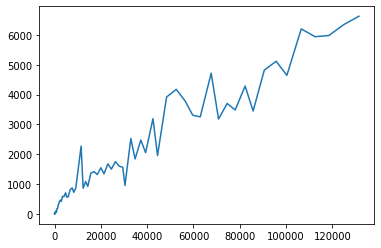

In [15]:
plt.plot(dt['confirmed'],dt['Infected'])

In [16]:
m

array([0.11941684])

In [17]:
1.0+m*14+m**2*24

array([3.01408493])

# State-Wise

In [18]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           1495 non-null   object
 1   Place           1456 non-null   object
 2   Date            1495 non-null   object
 3   Time            1495 non-null   object
 4   Infected        1495 non-null   int64 
 5   Total_Infected  1495 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 70.2+ KB


In [19]:
df['State'].unique()

array(['Kerela', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu And Kashmir',
       'Punjab', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'Odisha',
       'Uttarakhand', 'West Bengal', 'Pondicherry', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman And Nicobar', 'Goa',
       'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Dadra And Nagar Haveli', 'Meghalaya', 'Nagaland', 'Unassigned'],
      dtype=object)

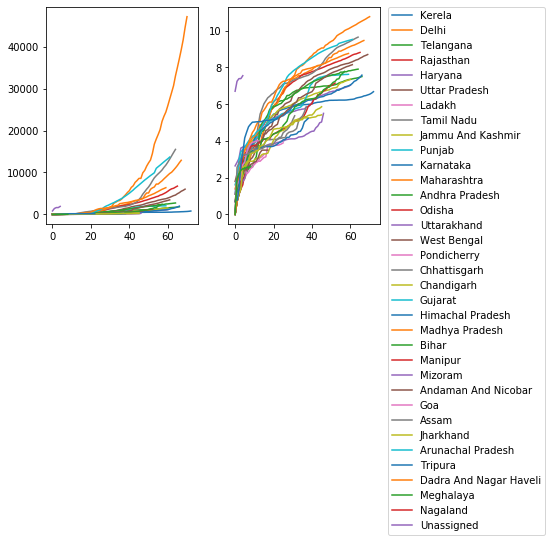

In [20]:
fig, ((ax1), (ax2))=plt.subplots(1,2)

def state(statename):
    statedata=df.loc[df['State']==statename]
    grouped=statedata.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
    grouped['confirmed']=grouped['Infected'].cumsum()
    ax1.plot(grouped.index, grouped['confirmed'], label=statename)
    #ax1.legend()
    ax2.plot(grouped.index, np.log(grouped['confirmed']), label=statename)
    #ax2.legend()

    return

for states in df['State'].unique():
    state(states)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.tight_layout(pad=10.0)    
plt.show()